#  THE SPARK FOUNDATION
## DATA SCIENCE & BUSINESS ANALYTICS INTERN (#GRIPFeb21)
## IMPLEMENTED BY: KUSHAGRA SRIVASTAVA
## TASK1: PREDICTION USING SUPERVISED ML
---------------------------------------------------------------------------------------------------------------------------------
 


## IMPORTING LIBRARIES

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


## READING AND PRINTING THE VALUE OF DATASET

In [3]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print(" ")
print("Data Imported Successfully")                    
data_extracted= data.head(10)                                          #head feature is used to slice first 10 rows from                                                                                     beginning else tail can be used to slice from bottom.
print(data_extracted)

 
Data Imported Successfully
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


### KNOWING THE SHAPE OF DATA

In [4]:
data_extracted.shape                                #For finding out the shape of the dataset 

(10, 2)

## PLOTTING IN GRAPHS

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


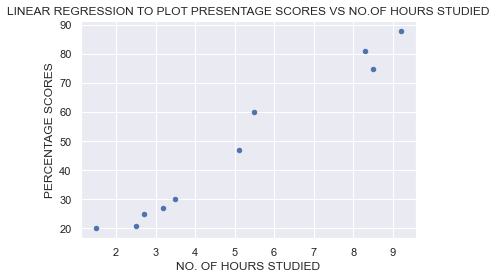

In [5]:
sns.set()
data_extracted.plot(kind='scatter', x='Hours',y='Scores')                #WE USE SEABORN TO MODIFY THE GRAPHS THAT HAVE BEEN                                                                                                 PLOTTED 

plt.title("LINEAR REGRESSION TO PLOT PRESENTAGE SCORES VS NO.OF HOURS STUDIED")
plt.xlabel("NO. OF HOURS STUDIED")
plt.ylabel("PERCENTAGE SCORES")
plt.show()

### *FROM THE GRAPH WE CAN CLEARLY SEE THAT THERE IS A POSITIVE LINEAR RELATION BETWEEN NO.OF HOURS STUDIED AND PERCENTAGE SCORES OF STUDENT*

In [6]:
hrs=data_extracted.iloc[0:10,0]
percentage=data_extracted.iloc[0:10,1]
print("DATASET FOR NUMBER OF HOURS STUDIED BY THE STUDENTS:")
print(hrs.values)                                  #USED FOR SLICING THE DATASET THAT HAVE BEEN CREATED . 
print("DATASET FOR PERCENTAGE SCORED BY THE STUDENTS:")

print(percentage.values)
X=hrs.values                                       #(.values) feature is used to access the values otherwise output would be                                                                 printed with index 0 to 9
Y=percentage.values                                        

DATASET FOR NUMBER OF HOURS STUDIED BY THE STUDENTS:
[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7]
DATASET FOR PERCENTAGE SCORED BY THE STUDENTS:
[21 47 27 75 30 20 88 60 81 25]


## HISTOGRAM 

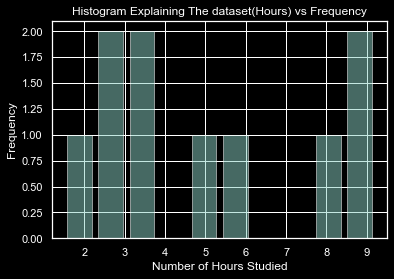

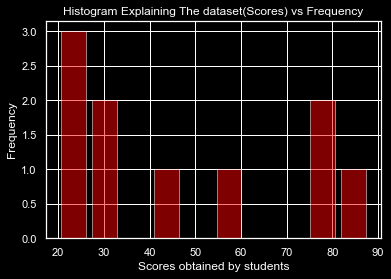

In [7]:

 #HISTOGRAM IS SPECIALLY USED TO EXPLAIN THE NUMBER OF TIMES THAT DATASET IS OCCURING BETWEEN RANGES AND IN EACH HISTOGRAM THERE SHOULD BE ONLY ONE VARIABLE
from matplotlib.pyplot  import style
sns.set()
style.use("dark_background")
hours_histogram=X
scores_histogram=Y
plt.hist(hours_histogram,histtype="bar",rwidth=0.8,alpha=0.5)
plt.xlabel("Number of Hours Studied")
plt.ylabel("Frequency")
plt.title("Histogram Explaining The dataset(Hours) vs Frequency")              
plt.show()
print(" ")
plt.hist(scores_histogram,histtype="bar",rwidth=0.8,alpha=0.5,color="red")
plt.xlabel("Scores obtained by students")
plt.ylabel("Frequency")
plt.title("Histogram Explaining The dataset(Scores) vs Frequency")
plt.show()


### WE HAVE ATTRIBUTES AND LABELS ,WE COULD SPLIT THE  DATA SET INTO  TRAINING AND TEST SETS.WE WILL DO THIS BY USING SCIKIT-LEARNS BUILT IN TRAIN_TEST_SPLIT METHODS.BY THIS METHOD WE COULD SPLIT THE DATASET INTO TRAINING SETS AND TEST SETS .WE PERFORM ALGORITHM WITH TRAINIG SETS AND HAVE THE EQUATION OF THE LINE .
### WITH THE HELP OF TEST SETS WE COULD TEST  THE CORRECTNESS OF THE MODEL .IF THAT MATCHES OR COMES CLOSE TO ORGINAL DATA ,THEN WE COULD ENSURE THAT OUR MODEL IS A GOOD MODEL .



### *BUT WE WILL BE PERFORMING MATHEMATICAL FORMULATIONS WITHOUT USING SKLIT LEARN*

In [8]:
x_mean=np.mean(X)
y_mean=np.mean(Y)
print("MEAN FOR X VALUES IS :", x_mean)
print("MEAN FOR Y VALUES IS:",y_mean)


MEAN FOR X VALUES IS : 5.0
MEAN FOR Y VALUES IS: 47.4


## CALCULATING THE VALUE OF COEFFICIENT AND INTERCEPT

In [9]:
num=0
den=0
for i in range(len(X)):
    num=num + (X[i]-x_mean)*(Y[i]-y_mean)
    den=den + (X[i]-x_mean)**2
b1=float(num/den)
b0=float(y_mean-(b1*x_mean))
print("VALUE OF CO-EFFICIENT IS:",float(b1))
print("VALUE OF INTERCEPT IS: ",float(b0))


VALUE OF CO-EFFICIENT IS: 9.392775881683733
VALUE OF INTERCEPT IS:  0.43612059158133576


### NOW ITS TIME TO GET THE PREDICTED VALUES OF Y

In [10]:
y_pred=b0+b1*X                  #it is also the equation of line
print("PREDICTED VALUES OF SCORES IS ",y_pred)

PREDICTED VALUES OF SCORES IS  [23.9180603  48.33927759 30.49300341 80.27471559 33.31083618 14.52528441
 86.8496587  52.09638794 78.39616041 25.79661547]


### WE GOT AN ARRAY OF Y(PREDICTED) BECAUSE WE HAVE PASSED AN ARRAY OF VALUES OF X

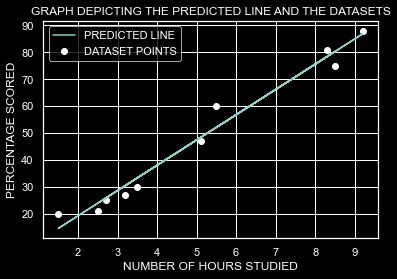

In [11]:
sns.set()
style.use("dark_background")

plt.scatter(X,Y,color="white",label="DATASET POINTS")
plt.plot(X,y_pred,label="PREDICTED LINE")
plt.xlabel("NUMBER OF HOURS STUDIED")
plt.ylabel("PERCENTAGE SCORED")
plt.title("GRAPH DEPICTING THE PREDICTED LINE AND THE DATASETS")
plt.legend()
plt.show()

### R-Square=1-(SUM OF RESIDUAL ERRORS /SUM OF TOTAL ERRORS)

In [12]:
num_r=0
den_r=0
for i in range(len(X)):
    num_r=num_r + (Y[i]-y_pred[i])**2
    den_r=den_r + (Y[i]-y_mean)**2

r_sq=1-float(num_r/den_r)
print("VALUE FOR R-SQUARE IS: ",r_sq)                           ##IT IS THE VALUE OF GOODNESS OF FIT WHICH TELLS HOW WELL THE                                                                             REGRESSION MODEL FIT THE OBSERVED DATA


VALUE FOR R-SQUARE IS:  0.9744798425879783


In [13]:
# COMPARING THE ACTUAL AND PREDICTED BY MAKING IT  IN THE DATA FRAME
df=pd.DataFrame({"ACTUAL":Y,"PREDICTED":y_pred })
print(df)

   ACTUAL  PREDICTED
0      21  23.918060
1      47  48.339278
2      27  30.493003
3      75  80.274716
4      30  33.310836
5      20  14.525284
6      88  86.849659
7      60  52.096388
8      81  78.396160
9      25  25.796615


## TESTING OUR OWN DATA AND PREDICTING THE VALUE WITH GIVEN HOURS

In [14]:
X_given=9.25
Y_pred=b0 + b1*X_given
Y_pred=b0 +b1*9.25
print("SCORE OBTAINED BY STUDENT IS:",Y_pred,"%" )

SCORE OBTAINED BY STUDENT IS: 87.31929749715587 %


# * MATHEMATICAL FORMULATIONS USING SKLIT-LEARN *

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

In [16]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()

regressor.fit(X_train.reshape(-1,1),Y_train)                           #we have to reshape the data into 1 dimensional array to                                                                                     perform the algorithm 
print("TRAINING COMPLETE.")




TRAINING COMPLETE.


[9.12960851]
1.8137590269859274
 


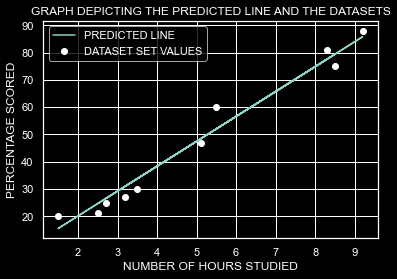

In [17]:
from matplotlib.pyplot import style
style.use("dark_background")

#PLOTTING THE REGRESSOR LINE
predicted_line=regressor.coef_*X +regressor.intercept_
print(regressor.coef_)
print(regressor.intercept_)
#PLOTTING FOR THE TEST DATA
print(" ")
plt.scatter(X,Y,label="DATASET SET VALUES",color="white")
plt.plot(X,predicted_line,label="PREDICTED LINE")
plt.legend()
plt.xlabel("NUMBER OF HOURS STUDIED")
plt.ylabel("PERCENTAGE SCORED")
plt.title("GRAPH DEPICTING THE PREDICTED LINE AND THE DATASETS")
plt.show()



## MAKING PREDICTIONS

### *NOW WE HAVE TRAINED OUR ALGORITHM ITS TIME TO MAKE PREDICTIONS*

In [18]:
print(X_test.reshape(-1,1))
PREDICTED_VALUES=regressor.predict(X_test.reshape(-1,1))

[[3.2]
 [8.3]]


In [19]:
df2=pd.DataFrame({"ACTUAL":Y_test,"PREDICTED":PREDICTED_VALUES})
print(df2)

   ACTUAL  PREDICTED
0      27  31.028506
1      81  77.589510


## PREDICTING PERCENTAGE SCORED WITH GIVEN DATA

In [20]:
HOURS=9.25
PRECENTAGE_SCORED=regressor.coef_*HOURS+regressor.intercept_
print("PERCENTAGE SCORED BY STUDENT IS:", PRECENTAGE_SCORED, "%")

PERCENTAGE SCORED BY STUDENT IS: [86.26263778] %


## WE FIND THE RESULT TO BE SOMEWHAT SAME USING SKLIT LEARN

# SUMMARY OF PLOTS 

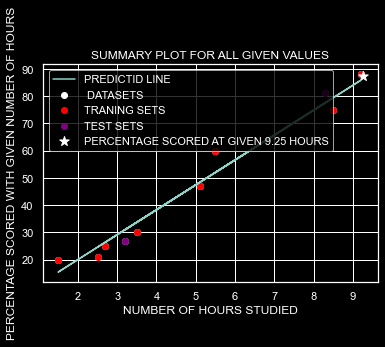

In [21]:
style.use("dark_background")
plt.plot(X,predicted_line,label="PREDICTID LINE")
plt.scatter(X,Y,color="white",label=" DATASETS")
plt.scatter(X_train,Y_train,color="red",label="TRANING SETS")
plt.scatter(X_test,Y_test,color="purple",label="TEST SETS")
plt.scatter(X_given,Y_pred,color="white",marker="*",s=100,label="PERCENTAGE SCORED AT GIVEN 9.25 HOURS")
plt.title("SUMMARY PLOT FOR ALL GIVEN VALUES")
plt.xlabel("NUMBER OF HOURS STUDIED")
plt.ylabel("PERCENTAGE SCORED WITH GIVEN NUMBER OF HOURS")
plt.legend()
plt.show()


# EVALUATING THE MODEL

In [22]:
from sklearn.linear_model import LinearRegression  ## METHOD USED HERE IS MEAN SQUARED ERROR
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y, y_pred)) 

Mean Absolute Error: 3.4265017064846397


## FROM THE MODEL WE FOUND WE HAVE HIGH R-SQUARED VALUE=0.9744798425879783 AND LOW MEAN ABSLOTE ERROR:3.4265017064846397
## SO WE COULD SAY THAT OUR MODEL IS GOOD AND WE HAVE PREDICTED RIGHT RESULT.

## PERCENTAGE SCORED WITH GIVEN NUMBER at given 9.25  HOURS IS: 87.31929749715587 %


# THANK YOU 